In [1]:
from ekpy import analysis
from ekpy.analysis import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use(plotting.lane_martin)

In [2]:
def _average_counts(data_dict,):
    #if len(data_dict['V'].shape) != 1:
    #    raise ValueError('_average_angles only works for 1d, ungrouped data.')
        
    df = pd.DataFrame(data_dict)
    grouping = df.groupby('count')
    out = {}
    for group in grouping:
        count, tdf = group
        means = {col:np.array([np.mean(tdf[col])]) for col in tdf}
        try:
            for key in means:
                out[key] = np.concatenate((out[key], means[key]))
        except KeyError:
            out.update(means)
            
    return out

def _offset_data(linear_offset,data_dict,):
    df = pd.DataFrame(data_dict)
    return{'H':df['H'], 'Vx':(df['Vx']+linear_offset)}

In [3]:
def _normalize_voltages(data_dict,):
    df = pd.DataFrame(data_dict)

    #First find the range, then find the '0' voltage.
    if 'V' in df.columns:
        V_range = 1.0#np.ptp(df['V'])
        V_zero = np.mean(df['V'])
        return {'H':df['H'], 'V':(df['V']-V_zero)/V_range}
    if 'Vx' in df.columns:
        Vx_range = 1.0#*np.ptp(df['Vx'])
        Vx_zero = np.mean(df['V'])
        Vy_range = 1.0#*np.ptp(df['Vy'])
        Vy_zero = np.mean(df['V'])
        return {'H':df['H'], 'V':(df['V']-Vx_zero)/Vx_range}#, 'Vy':(df['Vy']-Vy_zero)/Vy_range}
    
    
def _r_theta(data_dict,):
    df = pd.DataFrame(data_dict)
    r = np.sqrt(df['Vx']**2+df['Vy']**2)
    theta = np.arctan(df['Vy']/df['Vx'])
    return {'H':df['H'], 'r':r, 'theta':theta}

In [14]:
dset = analysis.load_Dataset('.\\Rustem\\S23-043D\\')
dset

,frequency_GHz,power,reverse,count,sleep_between_measurements,trial,filename
0,9,18,True,5,0.1,0,9GHz_power18_0.csv
1,9,12,False,30,0.1,0,9GHz_power12_0.csv
2,9,12,True,30,0.1,0,9GHz_power12_1.csv
3,9,12,False,30,0.1,1,9GHz_power12_2.csv
4,9,14,True,30,0.1,0,9GHz_power14_0.csv
5,9,14,False,30,0.1,0,9GHz_power14_1.csv
6,9,12,True,30,0.1,1,9GHz_power12_3.csv
7,9,12,False,30,0.1,2,9GHz_power12_4.csv
8,9,12,True,30,0.1,2,9GHz_power12_5.csv
9,9,12,False,30,0.1,3,9GHz_power12_6.csv


<AxesSubplot:>

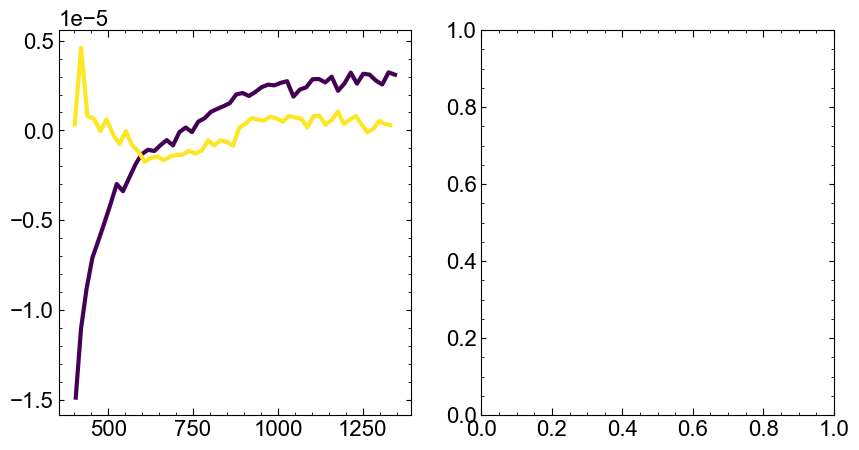

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,5))
#data = dset.query('frequency_GHz >1 and power ==10 and reverse == True').get_data().apply(_average_counts)
data = dset.query('filename == "9GHz_power12_5.csv" or filename == "9GHz_power12_6.csv"').get_data().apply(_average_counts)

# data.plot(x='H',y='V', ax = ax1)
data = data.apply( _normalize_voltages)
data.plot(x = 'H', y='V', ax = ax1)
#data.plot(x = 'H', y='V', ax = ax2)
# data = data.apply(_r_theta)
# data.plot(x='H', y='r',ax=ax1)
# data.plot(x='H', y='theta',ax=ax2)
#ax1.set_ylim((-0.1e-5,0.1e-5))

TypeError: unhashable type: 'slice'